# Un peu d'histoire...
<p><img src="https://s.france24.com/media/display/dcaf3d5e-0f33-11e9-818d-005056bff430/w:1280/p:16x9/ad006cb87fc226147ad451fdb9f5e48b.webp" alt="Credit card being held in hand"></p>

Le naufrage du Titanic le matin du 15 avril 1912, quatre jours après le début du voyage du navire de Southampton à New York, fut l'une des catastrophes maritimes les plus meurtrières de l'histoire en temps de paix, tuant plus de 1500 personnes. Le plus grand paquebot en service à l'époque, le Titanic comptait environ 2224 personnes à bord lorsqu'il a heurté un iceberg dans l'Atlantique Nord. Le navire avait reçu six avertissements de glace de mer mais se déplaçait à une vitesse presque maximale lorsque les belvédères ont aperçu l'iceberg. Incapable de tourner assez rapidement, le navire a subi un coup de regard qui a déformé le côté tribord (droit) et a ouvert cinq des seize compartiments à la mer. La catastrophe a provoqué une indignation généralisée face au manque de canots de sauvetage, aux réglementations laxistes et au traitement inégal des trois classes de passagers lors de l'évacuation. Les enquêtes recommandaient des changements radicaux de la réglementation maritime, conduisant à la Convention internationale pour la sauvegarde de la vie humaine en mer (1914), qui continue de régir la sécurité maritime.

## Ma démarche de travail consiste à : 
* **Faire une EDA (Exploratory Data Analysis)**
* **Data Wrangling (explorer les valeurs manquantes, convertir les variables catégoriques en numérique)**
* **Utilisation des algorithmes basiques avec la bibliotheque Scikit-learn**
* **Comparaison des differents modèles**

## 1- Exploratory Data Analysis (EDA) :
**OBJECTIF** : 
*   Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arrière).
*   Développer une première stratégie de modélisation.

In [8]:
#Importer les diffèrentes bibliotheques basiques
import numpy as np #manipuler des matrices, tableaux multidimensionnels, opérations mathématiques etc..
import pandas as pd #faire de l'analyse de données
import matplotlib.pyplot as plt #visualisations de bases
import seaborn as sns #visualisations avancées
sns.set()

In [9]:
data=pd.read_csv('titanic_data.csv') #importer notre dataset grace à pandas
df=data.copy()

In [10]:
df.head() #affiche par défaut les 5 premieres lignes, on peut rajouter un chiffre entre les () pour plus de lignes..

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [11]:
df.tail()# affiche par défaut les 5 dernieres lignes, meme explication que la précedente..

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [12]:
#Les dimensions de notre dataset
df.shape

(891, 12)

In [13]:
#autre méthode plus détaillée pour voir les lignes et colonnes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Remarque 1** :
Nous pouvons remarquer qu'il existe 12 colonnes (variables), Apres une courte recherche sur google, faisons une petite description de chacune d'entres elles afin d'avoir une idée plus claire pour la suite de notre analyse.

1) PassengerID: Sert comme index de notre dataset

2) Survived: 1 signifie que le passager a survecu, 0 signifie le contraire

3) PClass: La classe dans laquelle le passager a voyagé 

4) Name: Nom du passager

5) Sex: Femme ou Homme 

6) Age: L'Age du passager

7) SibSp: Le nombre de personnes à l'étranger, qui étaient soit le conjoint, soit les frères et sœurs du passenger

8) Parch: Le nombre de personnes à l'étranger, qui étaient soit les parents / enfants du passager

9) Ticket: Le numéro du ticket du passager 

10) Fare: Le prix du billet payé par le passager

11) Cabin: La cabine attribuée au passager

12) Embarked: Le port à partir duquel le passager a embarqué. C signifie Cherbourg; Q pour Queenstown et S pour Southampton

In [14]:
#Statistiques de base pour chaque variable
df.describe() #par defaut elle affiche que les variables numérique

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [15]:
df.describe(include='all') #pour afficher toutes les variables

PassengerId    Survived      Pclass                      Name   Sex  \
count    891.000000  891.000000  891.000000                       891   891   
unique          NaN         NaN         NaN                       891     2   
top             NaN         NaN         NaN  Cribb, Mr. John Hatfield  male   
freq            NaN         NaN         NaN                         1   577   
mean     446.000000    0.383838    2.308642                       NaN   NaN   
std      257.353842    0.486592    0.836071                       NaN   NaN   
min        1.000000    0.000000    1.000000                       NaN   NaN   
25%      223.500000    0.000000    2.000000                       NaN   NaN   
50%      446.000000    0.000000    3.000000                       NaN   NaN   
75%      668.500000    1.000000    3.000000                       NaN   NaN   
max      891.000000    1.000000    3.000000                       NaN   NaN   

               Age       SibSp       Parch Ticket        Fare        Cabin  \
count   714.000000  891.000000  891.000000    891  891.000000          204   
unique         NaN         NaN         NaN    681         NaN          147   
top            NaN         NaN         NaN   1601         NaN  C23 C25 C27   
freq           NaN         NaN         NaN      7         NaN            4   
mean     29.699118    0.523008    0.381594    NaN   32.204208          NaN   
std      14.526497    1.102743    0.806057    NaN   49.693429          NaN   
min       0.420000    0.000000    0.000000    NaN    0.000000          NaN   
25%      20.125000    0.000000    0.000000    NaN    7.910400          NaN   
50%      28.000000    0.000000    0.000000    NaN   14.454200          NaN   
75%      38.000000    1.000000    0.000000    NaN   31.000000          NaN   
max      80.000000    8.000000    6.000000    NaN  512.329200          NaN   

       Embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

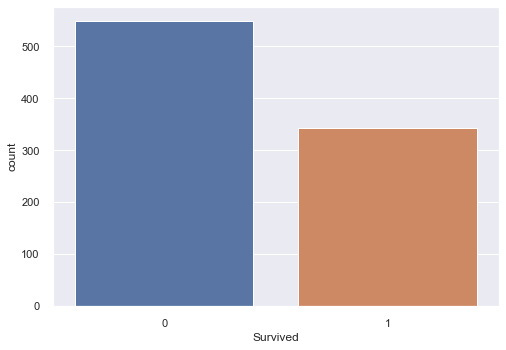

In [16]:
#Parmis tout les passagers, combien ont survecu ?
sns.countplot(x='Survived',data=df) #cette ligne de code de seaborn retourne un graphique en forme de bar qui addichera le nombre de survivants et de morts

In [17]:
#Afficher en % combien de passager ont survecu
(df.Survived.sum()/df.Survived.count()) * 100

38.38383838383838

In [18]:
#la fonction round retoune l'entier le plus proche
round((df.Survived.sum()/df.Survived.count()) * 100)

38.0

**Remarque 2** : Notre dataset contient beaucoup plus de morts que de survivants

In [19]:
#Qui a le plus survecu : Homme ou Femme ?
df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

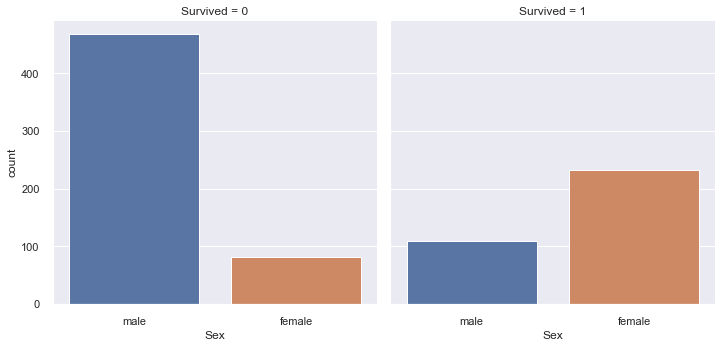

In [20]:
#On visualise tout ça
sns.catplot(x='Sex',col='Survived',kind='count',data=df)

In [21]:
#On va afficher ça autrement
print('le % des femmes qui ont survecu est de : ', (df[df.Sex=='female'].Survived.sum()/df[df.Sex=='female'].Survived.count())*100,'%')
print('le % des hommes qui ont survecu est de : ', (df[df.Sex=='male'].Survived.sum()/df[df.Sex=='male'].Survived.count())*100,'%')

le % des femmes qui ont survecu est de :  74.20382165605095 %
le % des hommes qui ont survecu est de :  18.890814558058924 %


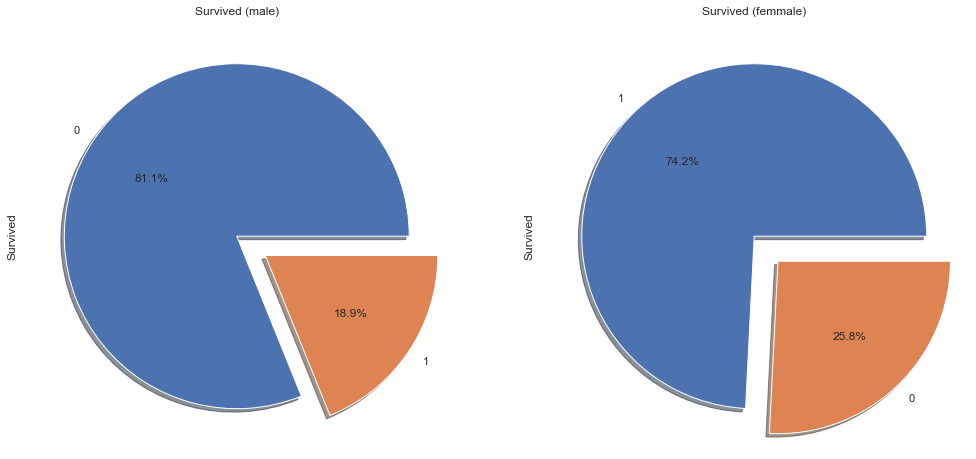

In [22]:
#On va afficher ça grace à un graphique en pie 
f,ax=plt.subplots(1,2,figsize=(17,8)) #création de deux graphiques (2) sur une meme ligne (1) (sans aucun contenu)
df['Survived'][df['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2], autopct='%1.1f%%',ax=ax[0],shadow=True)
df['Survived'][df['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2], autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (femmale)')

plt.show() #ligne de code utile car parfois les images ne s'affichent pas lorsque cette ligne n'est pas écrite

**Remarque 3** : 74% des femmes présentes à bord ont survecu contrairement aux hommes avec un pourcentage de 19%

In [23]:
#Analyse de la variable PClass
pd.crosstab(df.Pclass, df.Survived, margins=True)

Survived    0    1  All
Pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891

In [24]:
#La meme chose avec un autre desgin
pd.crosstab(df.Pclass, df.Survived, margins=True).style.background_gradient(cmap='autumn_r')

In [25]:
print('Le % des survivants pour chaque classe est :')
print('PClass=1 :', (df.Survived[df.Pclass==1].sum()/df.Survived[df.Pclass==1].count())*100,'%')
print('PClass=2 :', (df.Survived[df.Pclass==2].sum()/df.Survived[df.Pclass==2].count())*100,'%')
print('PClass=3 :', (df.Survived[df.Pclass==3].sum()/df.Survived[df.Pclass==3].count())*100,'%')

Le % des survivants pour chaque classe est :
PClass=1 : 62.96296296296296 %
PClass=2 : 47.28260869565217 %
PClass=3 : 24.236252545824847 %


In [26]:
#Relation entre La classe des passagers, le sexe 
pd.crosstab([df.Sex, df.Survived],df.Pclass).style.background_gradient(cmap='autumn_r')

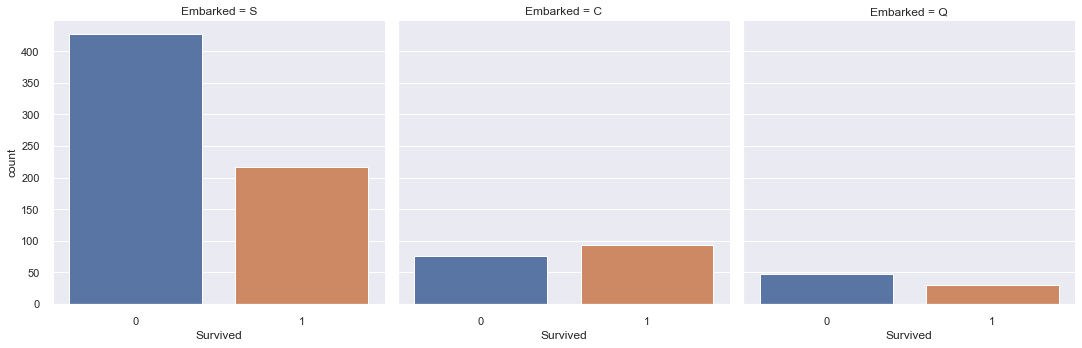

In [27]:
#Variables Embarked et Survived
sns.catplot(x='Survived', col='Embarked', kind='count',data=df)

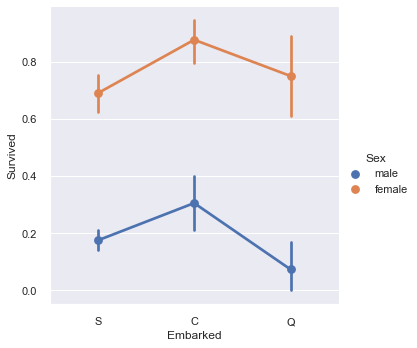

In [28]:
#Embarked et Sexe de la personne
sns.catplot('Embarked','Survived', hue='Sex', kind='point',data=df)

In [29]:
#Age : varibale continue en 8 groupes (bins)
for v in [df] :
    v['Age_bin']=np.nan
    for i in range (8,0,-1):
        v.loc[ v['Age'] <= i*10, 'Age_bin'] = i

In [30]:
print(df[['Age','Age_bin']].head(20))

     Age  Age_bin
0   22.0      3.0
1   38.0      4.0
2   26.0      3.0
3   35.0      4.0
4   35.0      4.0
5    NaN      NaN
6   54.0      6.0
7    2.0      1.0
8   27.0      3.0
9   14.0      2.0
10   4.0      1.0
11  58.0      6.0
12  20.0      2.0
13  39.0      4.0
14  14.0      2.0
15  55.0      6.0
16   2.0      1.0
17   NaN      NaN
18  31.0      4.0
19   NaN      NaN


In [3]:
from pandas_profiling import ProfileReport

In [4]:
#commande pour installer une nouvelle biblioteque pip install +le_nom_

In [5]:
!pip install autoviz 

ERROR: Error checking for conflicts.


Traceback (most recent call last):
  File "C:\Users\18197\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "C:\Users\18197\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\18197\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "C:\Users\18197\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\18197\Anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 517, 

In [32]:
profile = ProfileReport(df, title="Pandas Profiling Report", html={'style':{'full_width':True}})

In [33]:
profile.to_notebook_iframe()

In [35]:
#Exporter vers un fichier html 
profile.to_file(output_file='roro.html') #On le trouve dans le meme endroit ou le notebook est stocké 

In [36]:
from autoviz.AutoViz_Class import AutoViz_Class
AV=AutoViz_Class()

Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


In [39]:
target='Survived'
datapath=''
filename='titanic_data.csv'

Shape of your Data Set: (891, 12)
Classifying variables in data set...
    11 Predictors classified...
        This does not include the Target column(s)
    4 variables removed since they were ID or low-information variables
    List of variables removed: ['PassengerId', 'Name', 'Ticket', 'Cabin']
Since Number of Rows in data 891 exceeds maximum, randomly sampling 891 rows for EDA...
Total Number of Scatter Plots = 3
Nothing to add Plot not being added
All plots done
Time to run AutoViz (in seconds) = 2.956


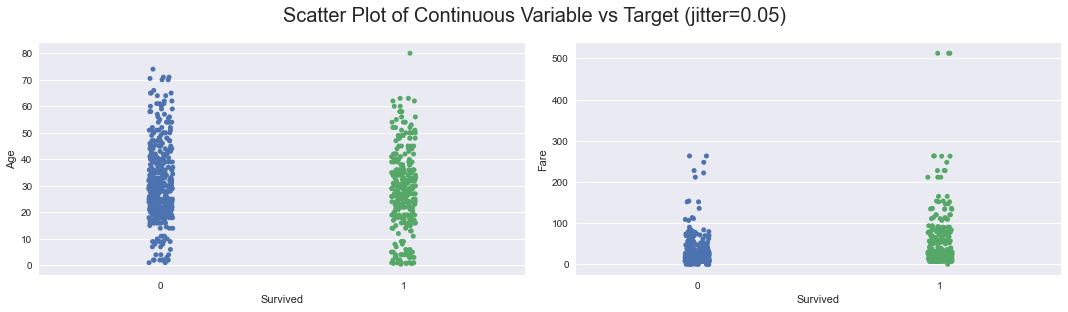

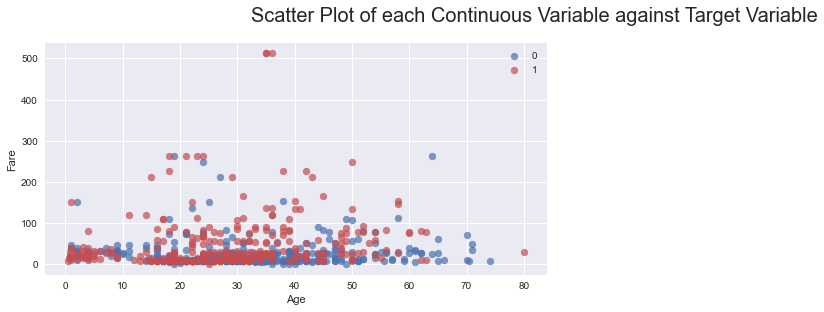

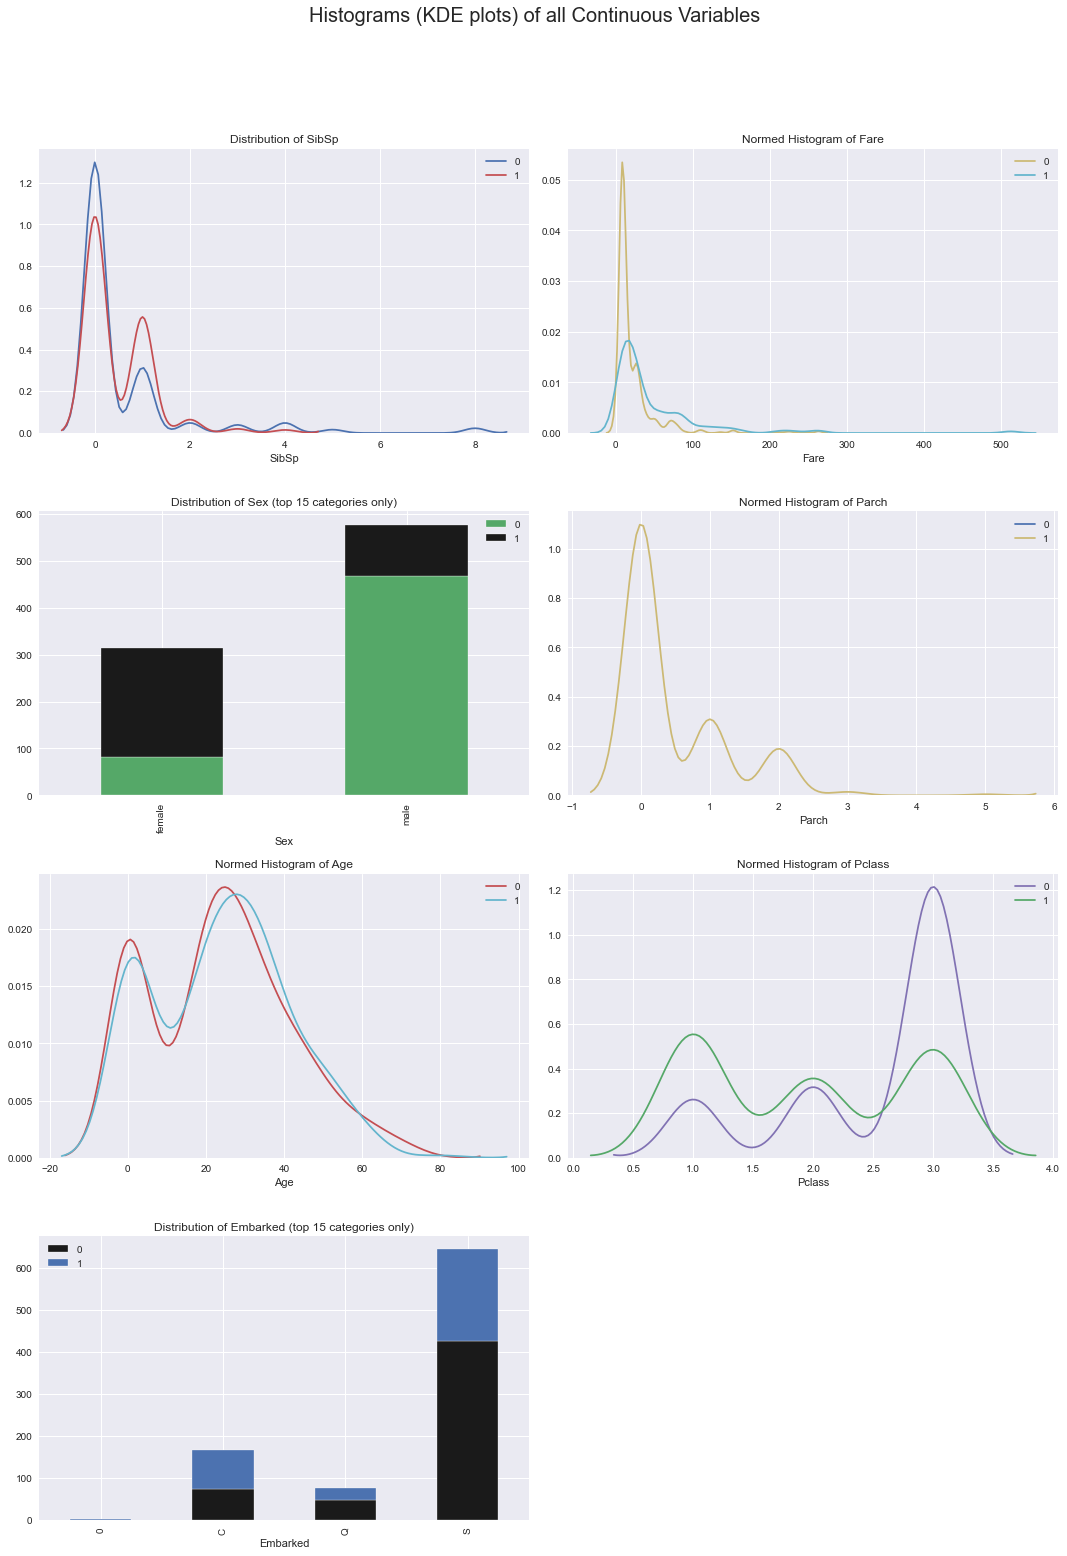

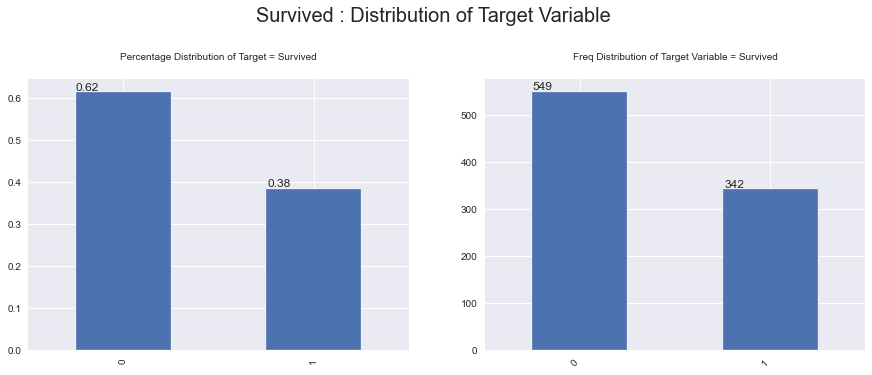

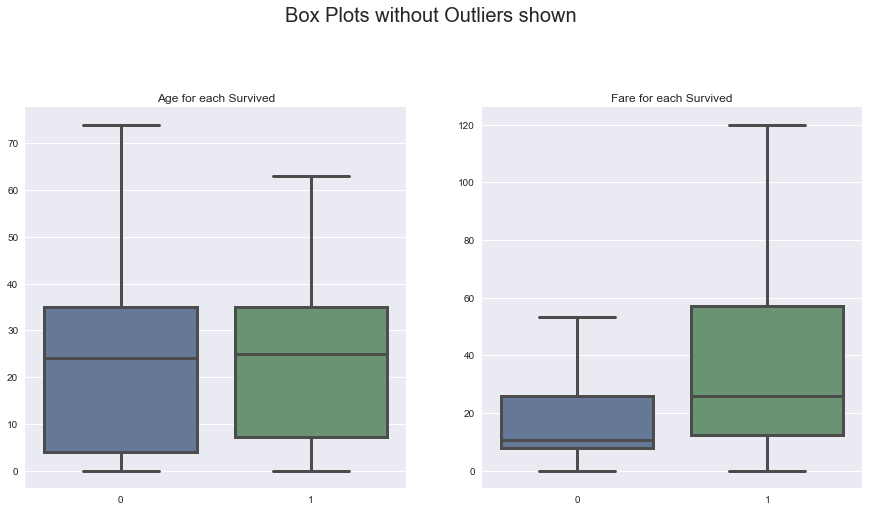

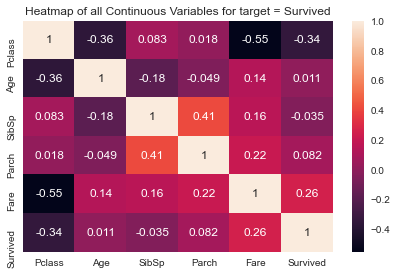

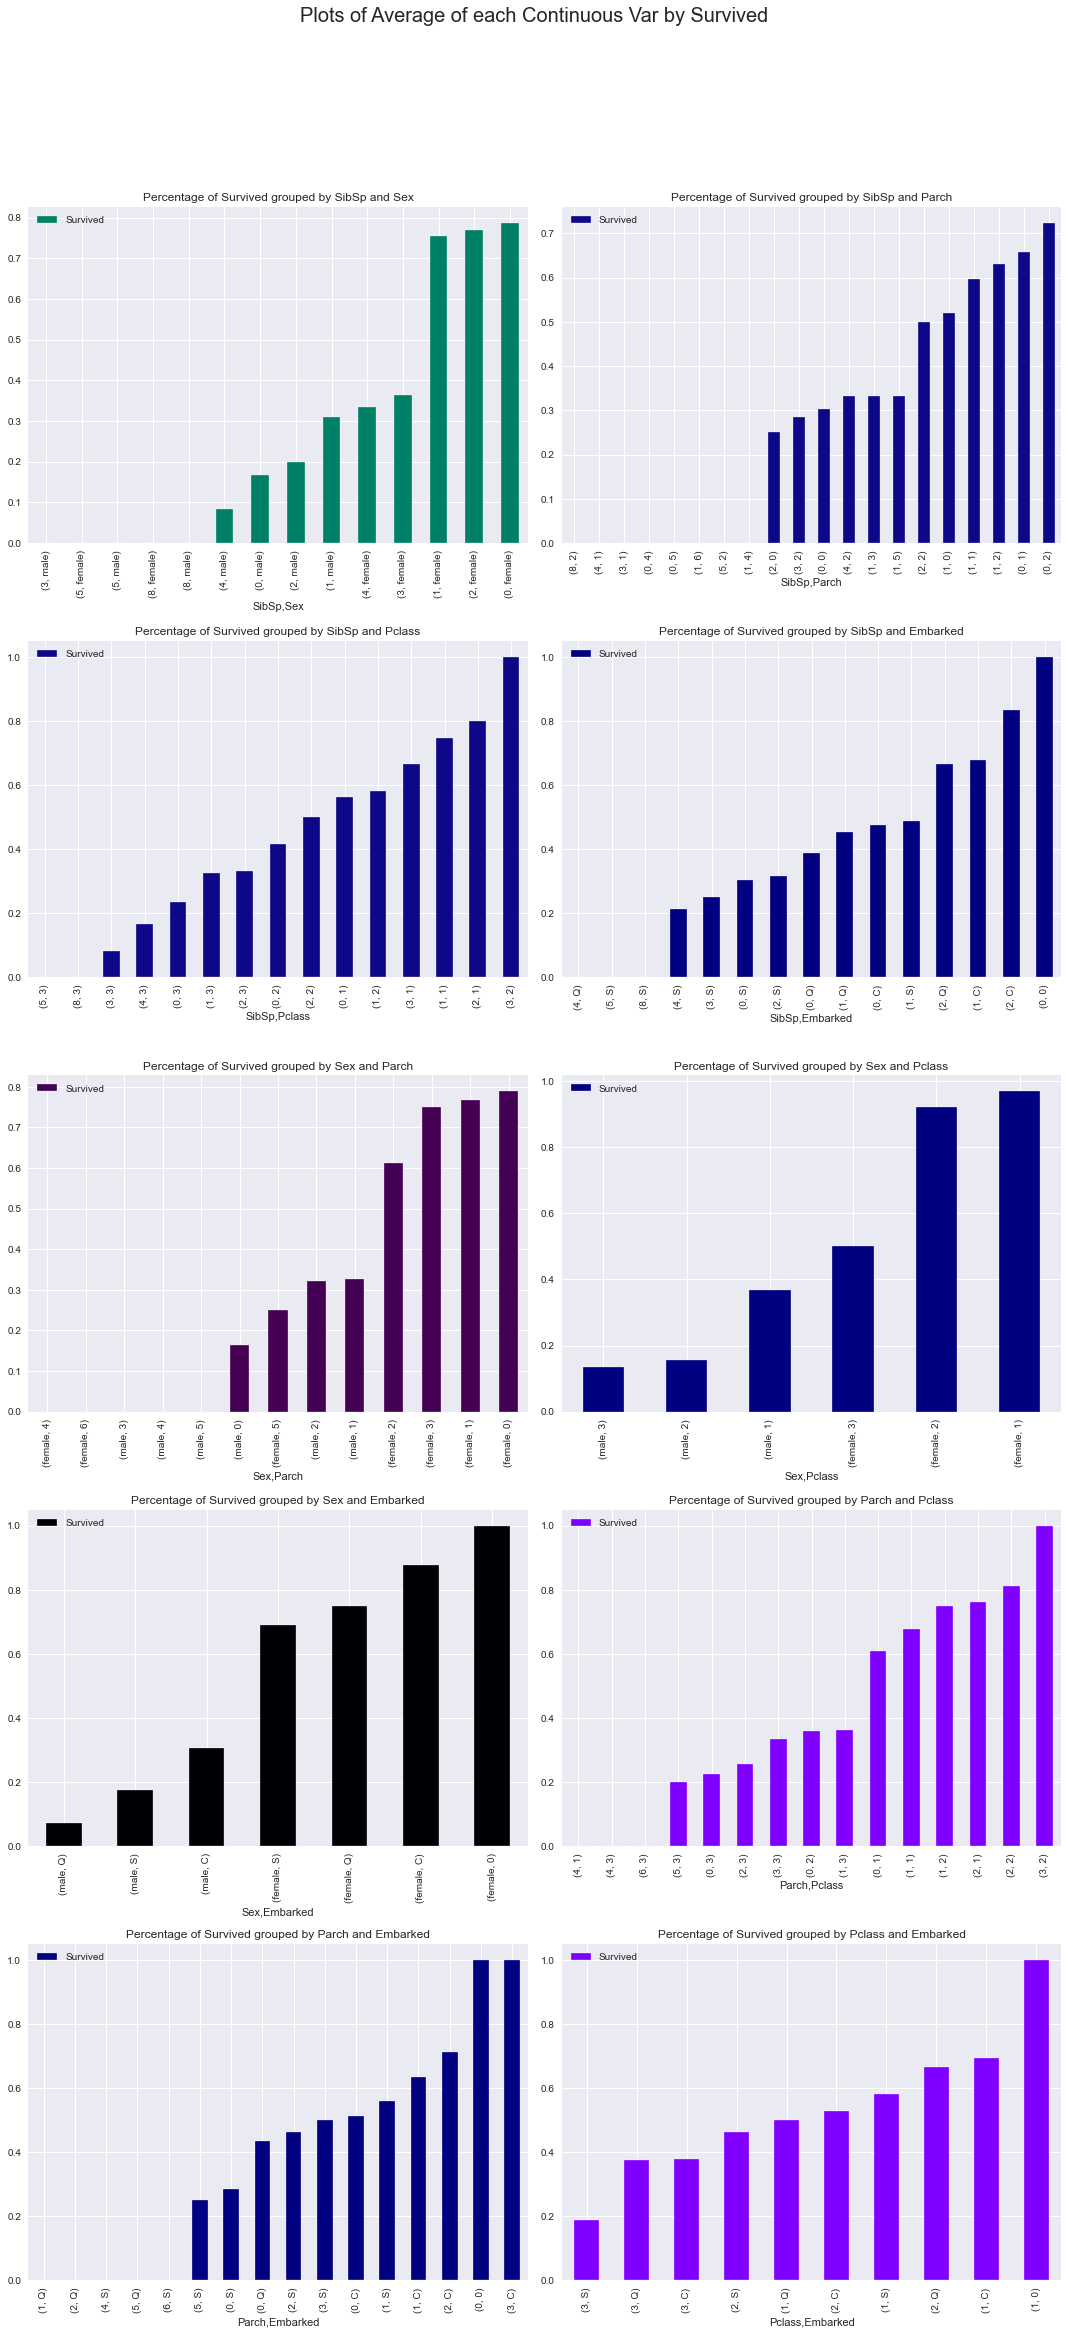

In [40]:
dft = AV.AutoViz(datapath+filename,depVar=target, dfte=df, header=0, verbose=2,
                            lowess=False,chart_format='svg',max_rows_analyzed=891,max_cols_analyzed=12)

## 2- Data Wrangling :
**OBJECTIF** : 
* Création d'un nouveau dataframe df_ml, ce dernier n'aura que des caractéristiques ordinales et aucune valeur manquante afin qu'il puisse être utilisé pour les algorithmes ML
* Conversion catégorielle en numérique par pd.get_dummies
* Supprimer toutes les fonctionnalités qui ne semblent pas utiles pour la prédiction, ensuite, utilisez le scaler standard et appliquez le fractionnement train / test

In [ ]:
#df_ml=data.copy()
#Utilisation de pandas get_dummies pour les variables catégoriques 
#df_ml=pd.get_dummies(df_ml,columns=['Sex','Embarked', 'Pclass'], drop_first=True)
#df_ml.drop(['PassengerId','Name','Ticket', 'Cabin'],axis=1,inplace=True)
#df_ml.dropna(inplace=True)

In [ ]:
#df_ml.head(10)

In [ ]:
#data.head()

In [ ]:
#age_av_male=data['Sex'=='male'].Age.mean()

In [42]:
#Age
data['Age']=data['Age'].fillna(data.groupby('Sex')['Age'].transform('mean'))


In [43]:
#Sex
data['Sex'].replace(['male','female'], [0,1], inplace=True)


In [44]:
data.isnull().sum()/len(data)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [45]:
#Fare
data['Fare'].fillna(np.mean(data['Fare']),inplace=True)

In [46]:
delete_columns=['Name','PassengerId', 'SibSp','Parch','Ticket','Cabin','Embarked']
data.drop(delete_columns, axis=1,inplace=True )

In [47]:
data.head()

Survived  Pclass  Sex   Age     Fare
0         0       3    0  22.0   7.2500
1         1       1    1  38.0  71.2833
2         1       3    1  26.0   7.9250
3         1       1    1  35.0  53.1000
4         0       3    0  35.0   8.0500

In [48]:
X=data.drop(['Survived'], axis=1)
X

Pclass  Sex        Age     Fare
0         3    0  22.000000   7.2500
1         1    1  38.000000  71.2833
2         3    1  26.000000   7.9250
3         1    1  35.000000  53.1000
4         3    0  35.000000   8.0500
..      ...  ...        ...      ...
886       2    0  27.000000  13.0000
887       1    1  19.000000  30.0000
888       3    1  27.915709  23.4500
889       1    0  26.000000  30.0000
890       3    0  32.000000   7.7500

[891 rows x 4 columns]

In [49]:
y=data['Survived']

In [50]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### First we apply the data from test/train split to get a first overview of the model performance.
### Later we use the k fold cross validation which gives a better estimate for out of sample data.

### For comparison of the results we use these metrics:
 accuracy_score, classification_report, confusion_matrix

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [54]:
# Logistic regression
from sklearn.linear_model import LogisticRegression 
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)
pred_logreg=logreg.predict(X_test)
print(confusion_matrix(y_test, pred_logreg))
print(classification_report(y_test, pred_logreg))
print(accuracy_score(y_test, pred_logreg))

[[93 17]
 [18 51]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       110
           1       0.75      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

0.8044692737430168


In [55]:
#Gaussian Naive bayes
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
pred_gnb=gnb.predict(X_test)
print(confusion_matrix(y_test, pred_gnb))
print(classification_report(y_test, pred_gnb))
print(accuracy_score(y_test, pred_gnb))

[[87 23]
 [16 53]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       110
           1       0.70      0.77      0.73        69

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.79      0.78      0.78       179

0.7821229050279329


In [56]:
#KNeihborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))
print(accuracy_score(y_test, pred_knn))

[[91 19]
 [31 38]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.78       110
           1       0.67      0.55      0.60        69

    accuracy                           0.72       179
   macro avg       0.71      0.69      0.69       179
weighted avg       0.72      0.72      0.71       179

0.7206703910614525


In [57]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
dtree=DecisionTreeClassifier(random_state=0)
dtree.fit(X_train,y_train)
pred_dtree=dtree.predict(X_test)
print(confusion_matrix(y_test, pred_dtree))
print(classification_report(y_test, pred_dtree))
print(accuracy_score(y_test, pred_dtree))

[[94 16]
 [23 46]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       110
           1       0.74      0.67      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179

0.7821229050279329


In [58]:
#En rajoutant des hyper parametres aux modeles le score s'améliore
dtree_2 = DecisionTreeClassifier(max_depth=6,  min_samples_split=8, random_state=0)
dtree_2.fit(X_train,y_train)
pred_dtree_2 = dtree_2.predict(X_test)
print(classification_report(y_test, pred_dtree_2))
print(accuracy_score(y_test, pred_dtree_2))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       110
           1       0.88      0.61      0.72        69

    accuracy                           0.82       179
   macro avg       0.83      0.78      0.79       179
weighted avg       0.83      0.82      0.81       179

0.8156424581005587


In [59]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))
print(accuracy_score(y_test, pred_rfc))


[[100  10]
 [ 19  50]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       110
           1       0.83      0.72      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179

0.8379888268156425


In [60]:
#En rajoutant un hyper parametre on remarque une petite amélioration
rfc_2=RandomForestClassifier(max_depth=8, random_state=0)
rfc_2.fit(X_train,y_train)
pred_rfc=rfc_2.predict(X_test)
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))
print(accuracy_score(y_test, pred_rfc))


[[104   6]
 [ 20  49]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       110
           1       0.89      0.71      0.79        69

    accuracy                           0.85       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.86      0.85      0.85       179

0.8547486033519553


In [61]:
#SVM Classifier 
from sklearn.svm import SVC
svc=SVC(gamma=0.01,C=100, random_state=0)
svc.fit(X_train,y_train)
pred_svc=svc.predict(X_test)
print(confusion_matrix(y_test, pred_svc))
print(classification_report(y_test, pred_svc))
print(accuracy_score(y_test, pred_svc))


[[92 18]
 [22 47]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       110
           1       0.72      0.68      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.78       179

0.776536312849162


**k fold cross_validation**

This algorithm splits the data into k sets and then makes k fits using every set k-1 times as training and one time as test data
It leads to a better estimate for out of sample data than simple train test split

In [62]:
from sklearn.model_selection import cross_val_score


In [63]:
#for svm classifier
scores_svc = cross_val_score(svc, X_train, y_train, cv=13, scoring='accuracy')
print(scores_svc)
print(scores_svc.mean())

[0.78181818 0.76363636 0.70909091 0.76363636 0.8        0.85454545
 0.63636364 0.78181818 0.81818182 0.72727273 0.87037037 0.7962963
 0.7962963 ]
0.7768712768712768


In [64]:
#for random foresst
scores_rfc = cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy')
print(scores_rfc)
print(scores_rfc.mean())

[0.81944444 0.83333333 0.78873239 0.83098592 0.81690141 0.83098592
 0.78873239 0.76056338 0.85915493 0.83098592]
0.8159820031298904


In [65]:
#for decision tree classifier
scores_dtree_2 = cross_val_score(dtree_2, X_train, y_train, cv=5, scoring='accuracy')
print(scores_dtree_2)
print(scores_dtree_2.mean())

[0.76923077 0.86713287 0.82394366 0.76056338 0.83802817]
0.8117797695262483


In [66]:
data

Survived  Pclass  Sex        Age     Fare
0           0       3    0  22.000000   7.2500
1           1       1    1  38.000000  71.2833
2           1       3    1  26.000000   7.9250
3           1       1    1  35.000000  53.1000
4           0       3    0  35.000000   8.0500
..        ...     ...  ...        ...      ...
886         0       2    0  27.000000  13.0000
887         1       1    1  19.000000  30.0000
888         0       3    1  27.915709  23.4500
889         1       1    0  26.000000  30.0000
890         0       3    0  32.000000   7.7500

[891 rows x 5 columns]

In [67]:
data['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [70]:
columns=['Survived','Pclass','Age']

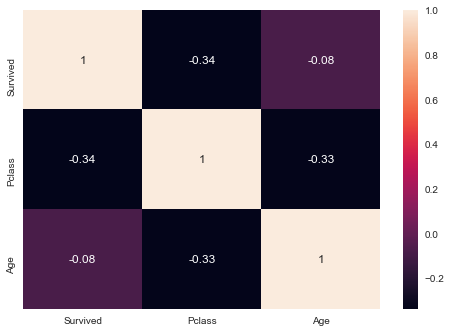

In [71]:
sns.heatmap(data[columns].corr(),annot=True)